
# Ylab Introduction to Arduino

![Class Objective](pinky_brain.jpg)



***
# What do we need to take over the world?

1. A way to take readings from the real world
1. A way to send output/control signals to the real world
1. Some logic (like a programmming language) to link the above
1. A really cheap board to do it all for us!

![Arduino Uno](arduino_uno.jpg)

Oh, yeah, and we might need some __significant power__. Don't forget about that.



# Lesson 1: The Arduino IDE
*__Integrated Development Enviroment__*
This is the software you download from [here](https://www.arduino.cc/en/Main/Software)

*  Plug in your Arduino board
*  Start the IDE
*  Find the board: __Tools -> Port__ and select the one with the Arduino
*  Programming Language:
    *  Pretty much based on C
    *  {} for nested structures and functions
    *  // for comments. Use lots!
    *  ; at the end of every statement
    *  __[Programming language reference here](https://www.arduino.cc/reference/en/)__
    *  Verify/compile by hitting the checkmark ico (top-left)
    
    *  If successfully compiled (no errors), load to Arduino with the right-arrow-in-a-circle icon

***
# Lesson 1A: Our First Program(s)
***

Programs??? Arduino calls them "sketches".

That's a cheap trick to avoid scaring away people who are frightened by C programs. 
*  ... which may actually be a healthy fear.



In [1]:
x=10
print(x)

10


In [1]:
%%arduino blink_led_13_commented -v
// Four Key Sections
// __Section 1: Constants and global variables__

// We're going to use Pin 13 on the board, which has a built-in LED and resistor
#define Pin13LED  13

// __Section 2: Intitialisation/setup__
void setup() {     //Note the opening squiggly bracket
   // Function to set the
   // CASE is Critical in C programming. Type EXACTLY!!! as written
   // We're setting up the pin for OUTPUT. 
   // Note the ; at the end of every line
   pinMode(Pin13LED,OUTPUT);  // Standard pinMode function
   // Set the pin to 0 volts (LOW). Opposite is high (5V)
   digitalWrite(Pin13LED, LOW);
}  // End setup()   

//__Section 3: The main loop__ that executes forever
void loop() {
   digitalWrite(Pin13LED,HIGH);  // Turn on the LED
   delay(1000);                  // Sleep for 1000 milliseconds
   digitalWrite(Pin13LED,LOW);   // Turn off the LED
   delay(1000);                  // Sleep off another second
}   // End loop()

//__Section 4: Any subroutines and Interrupt Service Routines (ISR)__
// We don't have any right now


Overwriting sketches/blink_led_13_commented/blink_led_13_commented.ino
-- verify option: Build only - will not attempt to load to board
Starting Arduino build
Command output :  Sketch uses 936 bytes (2%) of program storage space. Maximum is 32256 bytes.
Global variables use 9 bytes (0%) of dynamic memory, leaving 2039 bytes for local variables. Maximum is 2048 bytes.

Command errors:  Loading configuration...
Initializing packages...
Preparing boards...
Verifying...

Done


## The abbreviated version

#### Same program with the comments removed. Looks a lot less scary, doesn't it?

#### ... but... *going back a month later to fix an uncommented program is a lot scarier*



In [5]:
x=1
x=x+10
print(x)
z=x+2h
print(z)

11
13


In [3]:
%%arduino blink_led_13_uncommented -v
#define Pin13LED 13

void setup() {

  pinMode(Pin13LED,OUTPUT);
  digitalWrite(Pin13LED,LOW);
}

void loop() {

   digitalWrite(Pin13LED,HIGH);
   delay(1000);
   digitalWrite(Pin13LED,LOW);
   delay(1000);
}

Overwriting sketches/blink_led_13_uncommented/blink_led_13_uncommented.ino
-- verify option: Build only - will not attempt to load to board
Starting Arduino build
Command output :  Sketch uses 936 bytes (2%) of program storage space. Maximum is 32256 bytes.
Global variables use 9 bytes (0%) of dynamic memory, leaving 2039 bytes for local variables. Maximum is 2048 bytes.

Command errors:  Loading configuration...
Initializing packages...
Preparing boards...
Verifying...

Done


### Save the routine as blink_led (or something like that)


## Let's add some serial text output
*  Shorten the on/off cycle to 100 ms
*  Add a subroutine to tell it where we are
*  Note that every time we write, the transmit light comes on


In [3]:
%%arduino pin13_with_serial
#define Pin13LED 13
int loopcount = 0;    //<<<<<<<<<< Define a variable

void setup() {
  // put your setup code here, to run once:
  pinMode(Pin13LED,OUTPUT);
  digitalWrite(Pin13LED,LOW);
  Serial.begin(9600);  //<<<<<<<<<<<< Set up the serial port
}

void loop() {
  // put your main code here, to run repeatedly:
   loopcount++;      // <<<<<<<<<< C shorthand for loopcount = loopcount + 1
   digitalWrite(Pin13LED,HIGH);
   delay(100);       // <<<<<<<<<< Shorten the cycle time to 100 ms
   digitalWrite(Pin13LED,LOW);
   delay(100);       // <<<<<<<<<< Shorten the cycle time to 100 ms
   // <<<<<<<< Every 5th time through the loop, tell the world about it
   if ((loopcount % 5) == 0) {
      writeCount(loopcount);  // <<<<<<< Just for the heck of it, call a subroutine
   }
}

void writeCount(int x){
  Serial.println(x); 
}


Creating sketch directory sketches/ pin13_with_serial
Writing sketches/pin13_with_serial/pin13_with_serial.ino
Starting Arduino compile
Command output :  b'Sketch uses 2330 bytes (7%) of program storage space. Maximum is 32256 bytes.\r\nGlobal variables use 190 bytes (9%) of dynamic memory, leaving 1858 bytes for local variables. Maximum is 2048 bytes.\r\n'
Command errors:  b'Loading configuration...\r\nInitializing packages...\r\nPreparing boards...\r\nVerifying...\r\nUploading...\r\n'
Command exit status/return code :  0
done


#### Save the above as blink_with_serial (or something like that)

## So where do we see the serial output?

#### On the IDE: Open the Serial Monitor window to see the serial output
*  __Tools -> Serial Monitor__
*  Recompile and reload the program

#### For a different view:

*  Close the __Serial Monitor__ window
*  __Tools -> Serial Plotter
*  Recompile and reload the program


## Next we control the brightness of the LED... by turning it on and off
 
    Reopen the blinkled routine and edit it.
    
    


In [1]:
%%arduino blink_led_low_high
#define Pin13LED 13

void setup() {
  // put your setup code here, to run once:
  pinMode(Pin13LED,OUTPUT);
  digitalWrite(Pin13LED,LOW);
}

void loop() {
   int loopcount;
  // put your main code here, to run repeatedly:
   loopcount = 0;
   // Run a loop turning on LED for 10 ms and off for 5 ms
   while (loopcount < 100){
      loopcount++;
      digitalWrite(Pin13LED,HIGH);
      delay(10);
      digitalWrite(Pin13LED,LOW);
      delay(5);
   }
   loopcount = 0;
   // Run a loop turning on LED for 2 ms and off for 20 ms
   while (loopcount < 100){
      loopcount++;
      digitalWrite(Pin13LED,HIGH);
      delay(2);
      digitalWrite(Pin13LED,LOW);
      delay(20);
   }
}

Creating sketch directory sketches/blink_led_low_high
Writing sketches/blink_led_low_high/blink_led_low_high.ino
Starting Arduino compile
Command output :  b'Sketch uses 1010 bytes (3%) of program storage space. Maximum is 32256 bytes.\r\nGlobal variables use 9 bytes (0%) of dynamic memory, leaving 2039 bytes for local variables. Maximum is 2048 bytes.\r\n'
Command errors:  b'Loading configuration...\r\nInitializing packages...\r\nPreparing boards...\r\nVerifying...\r\nUploading...\r\n'
Command exit status/return code :  0
done


### This type of program loop that turns something on and off quickly is called *bit banging*.
### Bit Banging is very clever... but a waste of time and effort.

# Arduino is based on a microcontroller that has some very clever functions.

### PWM: Pulse Width Modulation
*  Standard part of most micro-controllers
*  Simulates analog voltage levels (0V - 5V) by rapidly turning 5V off and on
    *  *__... because cheap microcontrollers do not have analog output__*
*  Set level from 0 (0 volt average) to 255 (always on for 5 volts)
   **  so... 127 will be on half the time, and should average to about 2.5 volts
   
__ONLY CERTAIN OUTPUT PINS SUPPORT PWM__ (we'll get to that). Pin 13 with our LED does not.

__[More info on PWM](https://www.arduino.cc/en/Tutorial/SecretsOfArduinoPWM)__

# Lesson 1B: Build an oscilloscope to see what's happening


Big thanks to the amazing __[Oyvind](https://www.build-electronic-circuits.com/arduino-oscilloscope-updated/)__ for the brilliant 7 line oscilloscope. Check out his web site for lots of great educational stuff and projects.

We're going to take those 7 lines and improve it by adding PWM outputs to measure.

Enter the program below, start the serial monitor, compile and load.

In [1]:
%%arduino oscilloscope_with_pwm
void setup(){
  // put your setup code here, to run once:
  Serial.begin(9600);   //Set up serial connection
  // Set up PWM output on pins 9,10 and 11 for different levels.
  // You do it here because once it’s set up, it keeps running.
  // You don’t need it in the main loop so it doesn’t interfere
  // with the measurements.
  // Once it’s running, attached the wire from A0 to each pin to
  // see the square waveform generated by each value,
  pinMode(9, OUTPUT);  
  analogWrite(9,25);
  pinMode(10, OUTPUT);
  analogWrite(10,128);
  pinMode(11, OUTPUT);
  analogWrite(11,200);

  // Now let's set up a couple of basic digital pins
  pinMode(8, OUTPUT);
  digitalWrite(8, HIGH);
  pinMode(7, OUTPUT);
  digitalWrite(7, LOW);

  // Turn on Pin 13 LED so we see what's happening there.
  pinMode(13, OUTPUT);
  digitalWrite(13, HIGH);
}

void loop() {
  // put your main code here, to run repeatedly:
  int val = analogRead(A0); //Read analog pin
  Serial.println(val);      // Write analog value to serial port
}

Overwriting sketches/oscilloscope_with_pwm/oscilloscope_with_pwm.ino
Build will upload to board if compile successful
Starting Arduino build
Command output :  Sketch uses 2334 bytes (7%) of program storage space. Maximum is 32256 bytes.
Global variables use 188 bytes (9%) of dynamic memory, leaving 1860 bytes for local variables. Maximum is 2048 bytes.

Command errors:  Loading configuration...
Initializing packages...
Preparing boards...
Verifying...
Uploading...

Done


Plug one end of a wire into pin A0. What do you see?
*  We'll explain that one later. Can you guess what's happening?

Now plug the other end of the wire into each of 9, 10 and 11 to see what the PWM looks like.

Plug it into GND.

Plug it into 8 (HIGH) and 7 (LOW).

Plut it into pin 13 that's powering up the LED on HIGH.
*  Is it different from pin 8 (HIGH)? Why?

What is the highest value you see in all of the above?
*  You can open the regular text serial monitor to get an accurate reading.

What is the lowest value?

Does that range mean anything?

# Lesson 2: The Arduino Board

This reference diagra is from  __[this page](http://marcusjenkins.com/arduino-pinout-diagrams/)__. It has detailed diagrams of most of the Arduino variants. 

![Arduino Uno Diagram](ARDUINO_V2_Pinouts.png)



***
##  Arduino Board: Power and Ground Connections

*  __Where does the Arduino get its power?__
    *  USB cable: 5V only
    *  Power jack: 7-12V (VIN). 
        *  If connected, USB power disconnected. But USB serial communications still work
  
        
*  __Where are the ground pins?__        
*  __Where does the Arduino get its ground?__
    *  USB cable, if attached... which gets it from PC... which gets it from...
    *  If using external power supply, ground connector of supply
*  __Where are the power connectors for your devices/project?__
    *  Three points: 3.3V, 5V, and, if external power supply on power jack, VIN
    *  *__What is the voltage of VIN?__*
    
* __Be mindful of power limits__. We'll get to that later. It can be complicated.
    
    
    
    __[Read this to learn more about Arduino power and ground](https://www.open-electronics.org/the-power-of-arduino-this-unknown/)__. Also read the Q and A at the end.
    __[Example of a ground problem](https://electronics.stackexchange.com/questions/134255/floating-supply-and-usb-ground)__.
        

## Arduino Board Inputs and Outputs: How we talk to the world

### Analog In: Pins A0-A5.   0 to 5 volts, in 0-1023 levels
*  Sensors designed to provide reading between 0V and 5 V
*  analogRead() provides the value in range 0 (0volts) to 1023 (5 volts)
*  Now think about those oscilloscope readings.

### Digital Inputs - 0/LOW = 0 volts, 1/HIGH = 5 volts. Pins 0-13

Pull-up resistor may be required - internal or external
*  pinMode(PIN1, INPUT)  (internal resistor is 20K ohms)
*  digitalWrite(PIN1, HIGH)
or
*  pinMode(INPUT_PULLUP)
*  use external pull-up resistor
*  Pull-down not available external
*  It's for a reading (not power input), so you want low current, so high R -  a.k.a _high impedance input_

__[Read more here](https://www.arduino.cc/en/Tutorial/DigitalPins)

## But some of those digital pins have secondary uses
### Serial communication on USB: Pins 0 and 1 (UART)

*  Just like dumb old terminals and modems.
*  Don't use if your sketch will be communicating with your laptop over USB!

Serial programming __[example1](https://ns-electric.com/knowledge-base/intro-to-arduino-uart-serial-communication/)__ and __[example2](https://www.arduino.cc/en/tutorial/SoftwareSerialExample)__
__[Serial communication commands](https://www.arduino.cc/reference/en/language/functions/communication/serial/)__

### Interrupts: Digital pins 2 and 3
*  A way-cool way of triggering an action (by calling a function) when something happens. Instead of waiting around in a program loop.

__[Info and tutorial here](https://learn.sparkfun.com/tutorials/processor-interrupts-with-arduino/all)__

### I2C Communication Bus: Pins A4 and A5 (replicated on 27 and 28)
*  Like a mini-lan for multiple devices on just two wires.
*  Us
*  __[I2C Reference and code samples](https://howtomechatronics.com/tutorials/arduino/how-i2c-communication-works-and-how-to-use-it-with-arduino/)__

### Digital Outputs - 0/false = 0 volts, 1/true = 5 volts. Pins 0-13

*  We may be driving a device, so we want more current
  *  MAX: 40 mA; recommended to limit to 20 mA; ABSOLUTE MAX 200 mA
  *  Use 470 ohm or 1K ohm resistor to control
  *  Relays tend to need more current
  *  Pin 13 is special: already has LED and resistor
  
### PWM (sort of analog) outputs: pins 3,5,6,9,10,11
  *  Pulses on/off to provide _average_ voltage between 0 and 5 V
  *  0-255 levels 
  

### Serial/communication inputs: Pins 0 and 1
*  Serial (via USB) UART







# Exercise 1C: Modify our oscilloscope for accurate voltage readings

Remember the range you noted for the serial output of our oscilloscope?

You should now understand why we get those numbers/levels.

Simple math will reduce the range from 0-1023 to 0-5 volts.

But: 0-1023 is "int" (integer), which has no decimal points.

We'll need a floating point decimal number for our conversion.


In [1]:
%%arduino oscilloscope_pwm_volts
void setup() {
  // put your setup code here, to run once:
  Serial.begin(9600);   //Set up serial connection
  // Set up PWM output on pins 9,10 and 11 for different levels.
  // You do it here because once it’s set up, it keeps running.
  // You don’t need it in the main loop so it doesn’t interfere
  // with the measurements.
  // Once it’s running, attached the wire from A0 to each pin to
  // see the square waveform generated by each value,
  
  pinMode(10, OUTPUT);
  pinMode(11, OUTPUT);
  pinMode(9, OUTPUT);
  analogWrite(9,25);
  analogWrite(10,128);
  analogWrite(11,200);

  // Now let's set up a couple of basic digital pins
  pinMode(8, OUTPUT);
  digitalWrite(8, HIGH);
  pinMode(7, OUTPUT);
  digitalWrite(7, LOW);

  // Turn on Pin 13 LED so we see what's happening there.

  pinMode(13, OUTPUT);
  digitalWrite(13, HIGH);

  // 
}


void loop() {
  double volts; //We're going to need decimal points to be accurate
  // put your main code here, to run repeatedly:
  int val = analogRead(A0); //Read analog pin
  volts = (float (val)) / 204.8; // 1024/5 = 204 to reduce our range to 0->5 volts.
  Serial.println(volts);      // Write analog value to serial port
}

Creating sketch directory sketches/oscilloscope_pwm_volts
Writing sketches/oscilloscope_pwm_volts/oscilloscope_pwm_volts.ino
Build will upload to board if compile successful
Starting Arduino build
Command output :  Sketch uses 3774 bytes (11%) of program storage space. Maximum is 32256 bytes.
Global variables use 200 bytes (9%) of dynamic memory, leaving 1848 bytes for local variables. Maximum is 2048 bytes.

Command errors:  Loading configuration...
Initializing packages...
Preparing boards...
Verifying...
Uploading...

Done


# Optional Exercise 1D: Plotting multiple values

Official documentation on the plotter is pretty slim but it can plot multiple values if we have them on the same line, separate by a space.

__[Here's a pretty good tutorial](http://www.electronics-lab.com/project/using-arduino-ides-serial-plotter-feature/)__

The __Serial.println()__ function we've been using so far prints each value on a single line by sending a line feed after printing our variable.

__Serial.print()__ doesn't send the line feed.

Let's print a sine and a cosine wave. We'll cycle through plotting the angles from 0 degrees to 360 degrees.

Here the __[documentation for the cosine function](https://www.arduino.cc/reference/en/language/functions/trigonometry/cos/)__. Note that it expects an angle in radians.

$$radians = \frac{degrees \times \pi}{180}$$

> *BTW: That nice mathematical expression above is done with __[LaTex](https://en.wikibooks.org/wiki/LaTeX/Mathematics#Operators)__, which is directly supported in the Jupyter markdown cell. Latex is based on __[Tex](https://en.wikipedia.org/wiki/TeX)__, developed by the great __[Donald Knuth](https://en.wikipedia.org/wiki/Donald_Knuth)__.* What he said applies here: "Beware of bugs in the above code; I have only proved it correct, not tried it." Except that I haven't proven a thing.








In [10]:
%%jarduino sin_cos_plots -b micro -p COM5
void setup(){
    Serial.begin(115200);
}

void loop(){
    for (int angle = 0; angle < 360; angle ++){
        Serial.print(sin(angle * (PI/180)));
        Serial.print(" ");
        Serial.println(cos(angle * (PI/180)));
    }
}

Overwriting sketches\sin_cos_plots\sin_cos_plots.ino
Build will upload to board if compile successful
Using arduino port COM5
Starting Arduino build
Command:  "C:\Program Files (x86)\Arduino\arduino.exe" --upload --port COM5 --board arduino:avr:micro sketches\sin_cos_plots\sin_cos_plots.ino
Command output :  Sketch uses 5888 bytes (20%) of program storage space. Maximum is 28672 bytes.
Global variables use 165 bytes (6%) of dynamic memory, leaving 2395 bytes for local variables. Maximum is 2560 bytes.

Command errors:  Loading configuration...
Initializing packages...
Preparing boards...
Verifying...
Uploading...



Done


In [11]:
%%jarduino?


Notice how the colours are picked automatically for the two plots. We have no control over the colour.

The plots overlap. If we add an offset to the cosine plot, we can stack them.

In [12]:
%%jarduino sin_cos_plots_stacked
void setup(){
    Serial.begin(9600);
}

void loop(){
    for (int angle = 0; angle < 360; angle++){
        Serial.print(sin(angle * (PI/180)));
        Serial.print(" ");
        Serial.println(cos(angle * (PI/180))+2.5);
    }
}

Overwriting sketches/sin_cos_plots_stacked/sin_cos_plots_stacked.ino
Build will upload to board if compile successful
Starting Arduino build
Command output :  Sketch uses 3710 bytes (11%) of program storage space. Maximum is 32256 bytes.
Global variables use 202 bytes (9%) of dynamic memory, leaving 1846 bytes for local variables. Maximum is 2048 bytes.

Command errors:  Loading configuration...
Initializing packages...
Preparing boards...
Verifying...
Uploading...

Done


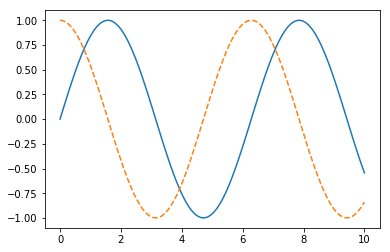

In [2]:
%matplotlib inline
import serial
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,10,100)
fig = plt.figure()
plt.plot(x,np.sin(x),'-')
plt.plot(x,np.cos(x),'--')

In [ ]:
# Testing live plotting

__(Based on this video)[https://www.youtube.com/watch?v=ZmYPzESC5YY]__

__(Also check out this one)[https://electronut.in/plotting-real-time-data-from-arduino-using-python/]__

__(and this link on the different backends)[https://medium.com/@1522933668924/using-matplotlib-in-jupyter-notebooks-comparing-methods-and-some-tips-python-c38e85b40ba1]__

*  inline: small graph
*  notebook: resizable/scalable

In [24]:
serialArduino.close()

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style

import serial

#style.use('fivethirtyeight)')
fig=plt.figure()

ax1 = fig.add_subplot(1,1,1)     # 1X 1 grid, plot #1

def animate(i):   # i is interval
    graph_data = open('samplefile.txt','r').read()
    lines = graph_data.split('\n')
    xs = []
    ys = []
    for line in lines:
        if len(line) > 1:
            x,y = line.split(',')
            xs.append(x)
            ys.append(y)
    ax1.clear()
    ax1.plot(xs,ys)
                      
ani = animation.FuncAnimation(fig, animate, interval = 10000) # interval is in ms
plt.show()
            

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style

import serial

#style.use('fivethirtyeight)')
fig=plt.figure()

ax1 = fig.add_subplot(1,1,1)     # 1X 1 grid, plot #1
def animate(i):   # i is interval
    graph_data = open('samplefile.txt','r').read()
    lines = graph_data.split('\n')
    xs = []
    ys = []
    for line in lines:
        if len(line) > 1:
            x,y = line.split(',')
            xs.append(x)
            ys.append(y)
    ax1.clear()
    ax1.plot(xs,ys)
                      
ani = animation.FuncAnimation(fig, animate, interval = 1000) # interval is in ms
plt.show
                      
                      


In [ ]:


serialArduino = serial.Serial('COM4', 9600)

plt.axis([0, 10, 0, 1])

for i in range(1000):
    
    z = serialArduino.readline()
    y=z[0]
    print("y=",y)
    plt.scatter(i, y)
    plt.pause(0.05)

plt.show()

In [21]:
%matplotlib inline
import serial
import matplotlib.pyplot as plt
import numpy as np


values = []

plt.ion()
cnt=0

serialArduino = serial.Serial('COM4', 9600)

def plotValues():
    plt.title('Serial value from Arduino')
    plt.grid(True)
    plt.ylabel('Values')
    plt.plot(values, 'rx-', label='values')
    plt.legend(loc='upper right')

def doAtExit():
    serialArduino.close()
    print("Close serial")
    print("serialArduino.isOpen() = " + str(serialArduino.isOpen()))

#atexit.register(doAtExit)

print("serialArduino.isOpen() = " + str(serialArduino.isOpen()))

#pre-load dummy data
for i in range(0,26):
    values.append(0)
    
while True:
    while (serialArduino.inWaiting()==0):
        pass
    print("readline()")
    valueRead = serialArduino.readline()

    valueInInt = float(valueRead)
    print(valueInInt)

    values.append(valueInInt)
    values.pop(0)
    drawnow(plotValues)
    

serialArduino.isOpen() = True
readline()
2.86


NameError: name 'drawnow' is not defined

### *Optional*: How could we make the two plots cycle faster on the graph?


>> *Note to the hardcore C programmers*: Unlike C's *printf*, *Serial.print* functions only support a single variable.   You could build a single string - butwe're dealing with a slow, memory-limited microcontroller. The memory space and performance for the string concatenation operation could be considerably more than calling the functions separately.

>> For more serious plotting and instrumentation graphics for your project, check out the __[Processing](https://processing.org/)__ development kit. For a simple example, see __[Oyvind's original oscilloscope project](https://www.build-electronic-circuits.com/arduino-oscilloscope/)__ that used Processing before the Arduino serial plotter was released.


# Exercise 1E: Plotting multiple values

This time, we are going to plot all three of our PWMs from pins 9, 10 and 11 from Exercice 1D

We will plot 3 values, being read by A0, A1 and A2.

We sent each set of 3 to the serial port separated by a space, with a line feed on the last one.

The plotter will assign its own colours.

Bonus points for:

*  The plots will overlap in different colours. Can you add an offset to the values to stack them up?

In [ ]:
%%arduino 3_channel_scope_with_interrupt
volatile boolean LED_ON = false; // volatile is important for interrupts
volatile long debounce_time = 0;
volatile long current_time = 0;


void setup() {
  //start serial connection
  Serial.begin(9600);
  //configure pin 2 as an input and enable the internal pull-up resistor
  pinMode(2, INPUT_PULLUP);
  attachInterrupt(digitalPinToInterrupt(2),buttonPressed,RISING);
  pinMode(13, OUTPUT);
  digitalWrite(13,LOW);

}

void loop() {
  //read the pushbutton value into a variable
  delay(2000);
  Serial.println("Dum dee dum dee dum...");
}

void buttonPressed(){
  current_time = millis();
  if ((current_time - debounce_time) > 200) {
     Serial.println("Button Pressed!");  //*** BAD IDEA. This is slow. Interrupt process should be brief.
     if (LED_ON == true){
       digitalWrite(13,LOW);
       LED_ON = false;
     }
     else { // LED is off
       digitalWrite(13,HIGH);
       LED_ON = true;
     }
  } // end if
  debounce_time = current_time;
}

In [1]:
%%arduino really_simple_3_channel_
volatile long debounce_time = 0;
volatile long current_time = 0;
volatile float plot_offset = 0.0;




void setup() {
  // put your setup code here, to run once:
  Serial.begin(9600);   //Set up serial connection
  // Set up PWM output on pins 9,10 and 11 for different levels.
  // You do it here because once it’s set up, it keeps running.
  // You don’t need it in the main loop so it doesn’t interfere
  // with the measurements.
  // Once it’s running, attached the wire from A0 to each pin to
  // see the square waveform generated by each value,
  
  pinMode(10, OUTPUT);
  pinMode(11, OUTPUT);
  pinMode(9, OUTPUT);
  analogWrite(9,25);
  analogWrite(10,128);
  analogWrite(11,200);

  // Now let's set up a couple of basic digital pins
  pinMode(8, OUTPUT);
  digitalWrite(8, HIGH);
  pinMode(7, OUTPUT);
  digitalWrite(7, LOW);

  // Turn on Pin 13 LED so we see what's happening there.

  pinMode(13, OUTPUT);
  digitalWrite(13, HIGH);

  // Set up Pin 2 for the button and interrupt handler
  // configure pin 2 as an input and enable the internal pull-up resistor
  pinMode(2, INPUT_PULLUP);
  attachInterrupt(digitalPinToInterrupt(2),buttonPressed,RISING);
   

  // 
}


void loop() {

  // put your main code here, to run repeatedly:
  float val0 =  (float (analogRead(A0))) / 204.8; //Read analog pin
  float val1 =  ((float (analogRead(A1)))  / 204.8) + plot_offset;
  float val2 =  ((float (analogRead(A2)))  / 204.8) + (plot_offset * 2.0);

  Serial.print(val0);
  Serial.print(" ");
  Serial.print(val1);
  Serial.print(" ");
  Serial.println(val2); // Write analog value to serial port
}

void buttonPressed(){
  current_time = millis();
  if ((current_time - debounce_time) > 100) {

     if (plot_offset == 7){
       plot_offset = 0;
     }
     else { 
       plot_offset = 7;
     }
  } // end if
  debounce_time = current_time;
}

Creating sketch directory sketches/really_simple_3_channel_
Writing sketches/really_simple_3_channel_/really_simple_3_channel_.ino
Build will upload to board if compile successful
Starting Arduino build
Command output :  Sketch uses 4586 bytes (14%) of program storage space. Maximum is 32256 bytes.
Global variables use 218 bytes (10%) of dynamic memory, leaving 1830 bytes for local variables. Maximum is 2048 bytes.

Command errors:  Loading configuration...
Initializing packages...
Preparing boards...
Verifying...
Uploading...

Done


In [33]:
%matplotlib?

***
# Lesson 2: Power and Ground and Short Circuits

## What is ground?

- It's our zero volt reference - because voltage is a *potential difference*
- It can be different at different points. COMMON GROUND is important
- It is definitely a safety thing

![Ground diagrams](ground_diagrams.jpg)

-  In the last picture - is our ground the same?
    -  __YES, THERE CAN BE A POTENTIAL/VOLTAGE DIFFERENCE BETWEEN TWO GROUND POINTS__
-  [Read way more about it here](https://www.allaboutcircuits.com/technical-articles/an-introduction-to-ground/)


### RJ's Rule #1: 
# If you don't see a resistor or something providing resistance,there's something wrong with your circuit

![Water Tower](water_tower_short_circuit.jpg)

Imagine a water tower.
-  Pipe coming out of the bottom is a resistance.
-  The bottom blowing out is a short circuit.
-  __You don't want to be between the power source and ground__

# Basic Arduino Kit
-- Arduino Uno
-- Breadboard
-- 22 gauge wire
-- Wire cutter/stripper/crimper
-- Resistor assortment

## and whatever you want to hook up


# The most basic Arduino circuit

An LED
-  Diode
    ![LED and symbol](LED_and_symbol.png)
    -  one-way electrical valve
    -  NOT A RESISTANCE
    -  LED: a minute amount of resistance to emit light
        -  In our kits, not enough to be counted
        -  Different situatio for high-power LEDs and strips
    -  Long lead: +  
    -  Short lead/flat side: -  *A minus sign is flat*
    

[Read way more about polarity for different devices here](https://learn.sparkfun.com/tutorials/polarity/all)
        
-  A resistor
  -  220 ohms is a good value - relatively low to let power through to LED
  -  Effectively controls maximum brightness
  -  Effectively controls how fast you will wear out your battery
      -  Counter intuitive? Higher resistance = longer battery life
          -  Because it's like using a smaller pipe - water drains slower

The most basic electric circuit
![Old and new](old_and_new_circuit.png)
### The short circuit and ground rules apply on every connection loop!

# The Breadboard

![Broadboard diagram,20%](breadboard_sample.jpg)

Tip: use 22 gauge wire. Buy different colours

Read this excellent __[breadboard tutorial](https://learn.sparkfun.com/tutorials/how-to-use-a-breadboard/all)__

# RJ'S Rules
## 1. If you don't have a resistor - or something providing resistance -  in the circuit, there's something wrong
### An LED does not provide resistance.
## 2. Link everything to the same ground
## 3. Separate control power (Arduino) from device power



In [3]:
# First Arduino Circuit (finally!)



# Arduino Interrupt Programming

Most programs:

    void loop{
        waste_some_time()
        check_again()
    }
    
Interrupt:
*  Define one or more events (something that moves voltage low->high or high->low)
*  Define what to do when each of those events happen (subroutine)
*  Go merrily along your way... do other stuff... or sleep.

Benefits:
*  Almost instantaneous reaction - no waiting until a timer expires or a sequence of instructions finishes in a loop
*  Prevents you from missing multiple events during your loop
*  Much lower power consumption when Arduino is in sleep mode

__[Why the control value must be declared as volatile](https://www.arduino.cc/reference/en/language/variables/variable-scope--qualifiers/volatile/)__. It also covers how to block interrupt processing

__[This is an excellent tutorial](https://www.instructables.com/id/Arduino-Interrupts/)__

__[This fast-talking video is a great example](https://www.youtube.com/watch?v=QtyOiTw0oQc)__

__[Heavy duty article](https://playground.arduino.cc/code/interrupts)__


    
You can also do interrupts based on timers - i.e. every XX milliseconds. It's a little more complicated, but here's a great __[Arduino Timer Interrupt Tutorial](https://www.instructables.com/id/Arduino-Timer-Interrupts/)__  




# I2C - Inter-Integrated Circuit Communications

### The basics

*  Used for more complex peripherals like displays
*  Communication bus between ICs - multiple masters and slaves
*  Developed by Philips in 1982
    *  Subset: SMBus developed by Intel with stricter usage rules
*  Common speeds: 100 kbit/s (Standard mode) to 400 kbit/s (Fast mode). New modes up to 3.4 Mbit/s
*  Up to 1008 nodes; 10 bit addresses
*  __[Wikipedia has an excellent reference](https://en.wikipedia.org/wiki/I%C2%B2C)__

### Arduino Connection

* Arduino Uno: Pins A4 and A5 - which are also connected to 27 and 29 on Arduino V3

### The caveats
*  Watch out for 3.3V vs 5V devices. Arduino UNO is 5V; other models are 3.3V. Each peripheral may be one or the other.
*  Use a Logic Level Converter to connect the two - or you may blow out your 3.3V device. __[This is how to do it.](https://www.robotshop.com/community/blog/show/running-both-5v-and-3-3v-devices-on-i2c__



# Linking Arduino and Raspberry Pi

__[Interrupts: Raspberry Pi and GPIO](https://raspi.tv/2013/how-to-use-interrupts-with-python-on-the-raspberry-pi-and-rpi-gpio)__

__[Python and Firmata](https://learn.adafruit.com/circuit-playground-firmata/example-python-code)__

__[Configuring Raspberry Pi for I2C](https://diyprojects.io/activate-i2c-bus-raspberry-pi-3-zero/)__. Be sure to use this one if you are using a relatively recent version. Quite a few of the older instructions don't work. This one worked perfectly on a Raspberry Pi 2 with the latest Raspbian as of Feb 2019. You may not have to do anything - just test by running __sudo i2c-detect -y 1__
  *  __Warning__: This reference is using an Arduino Nano that has 3.3V pins. That's compatible with Raspberry Pi,
  *  If you want to use Arduino Uno (5V pins), you should use a logic level converter. See earlier section on I2C.
  *  There are some __[references like this one](https://oscarliang.com/raspberry-pi-arduino-connected-i2c/)__ that say you can use 3.3V RPi as master with Arduino UNO as slave. Buyer beware.






# Using Libraries - Distance/range sensor - HC-SR04

A lot of complex functions are handled by libraries that you can search and load directly from the Arduino IDE.

An example is the HC-SR04,

![](HC-SR04.png)


__[This complete guide](https://randomnerdtutorials.com/complete-guide-for-ultrasonic-sensor-hc-sr04/)__ shows you how to do it with your own code, then does it with a great library.

Libraries are accessed from the IDE with __Tools -> Manage Libraries__. 
Search for the __newping__ library and click on the entry to download it.

The code is in the following box.


In [ ]:
# Adding a display

educ8s.tv has a [video](https://www.youtube.com/watch?v=E6quVf1_BIg) and an [article](http://educ8s.tv/tutorials/best-arduino-display/)

In [19]:
%%writefile HC_SR04_newping/HC_SR04_newping.ino
/*
 * Posted on https://randomnerdtutorials.com
 * created by http://playground.arduino.cc/Code/NewPing
*/

#include <NewPing.h>
 
#define TRIGGER_PIN 11
#define ECHO_PIN 12
#define MAX_DISTANCE 200

// NewPing setup of pins and maximum distance
NewPing sonar(TRIGGER_PIN, ECHO_PIN, MAX_DISTANCE); 
 
void setup() {
   Serial.begin(9600);
}
 
void loop() {
   delay(50);
   unsigned int distance = sonar.ping_cm();
   Serial.print(distance);
   Serial.println("cm");
}

Writing HC_SR04_newping/HC_SR04_newping.ino


__%%magic_name?__ provides help and source of the macro.

osm.py contains the %%writefile source
script.py contains %%cmd

__[The Arduino command line page](https://github.com/arduino/Arduino/blob/master/build/shared/manpage.adoc)__

__[Creating a magic](http://mlexplained.com/2017/12/28/creating-custom-magic-commands-in-jupyter/)__ and __[another one](https://stackoverflow.com/questions/38020679/jupyter-write-a-custom-magic-that-modifies-the-contents-of-the-cell-its-in)__ and possible __[the best one](https://ipython-books.github.io/14-creating-an-ipython-extension-with-custom-magic-commands/)__

Information on function decorators __[here (tutorial)](https://www.python-course.eu/python3_decorators.php)__ , __[here](https://www.thecodeship.com/patterns/guide-to-python-function-decorators/)__ and __[here (more theoretical)](https://www.thecodeship.com/patterns/guide-to-python-function-decorators/)__

In [27]:
%%system?



In [23]:
%%cmd
"C:\Program Files (x86)\Arduino\arduino.exe" --upload HC_SR04_newping/HC_SR04_newping.ino

Microsoft Windows [Version 10.0.17763.253]
(c) 2018 Microsoft Corporation. All rights reserved.

C:\Users\rjjun\github\Arduino_Tutorial_1>"C:\Program Files (x86)\Arduino\arduino.exe" --upload HC_SR04_newping/HC_SR04_newping.ino

C:\Users\rjjun\github\Arduino_Tutorial_1>Sketch uses 2456 bytes (7%) of program storage space. Maximum is 32256 bytes.
Global variables use 212 bytes (10%) of dynamic memory, leaving 1836 bytes for local variables. Maximum is 2048 bytes.


Loading configuration...
Initializing packages...
Preparing boards...
Verifying...
Uploading...


In [18]:
%%cmd
mkdir HC_SR04_newping

Microsoft Windows [Version 10.0.17763.253]
(c) 2018 Microsoft Corporation. All rights reserved.

C:\Users\rjjun\github\Arduino_Tutorial_1>mkdir HC_SR04_newping

C:\Users\rjjun\github\Arduino_Tutorial_1>

# Documenting your project: fritzing

http://fritzing.org

In [4]:
%%writefile test_code.txt
{
# This is a test
}

Writing test_code.txt


FileNotFoundError: [Errno 2] No such file or directory: 'test_code.txt'

In [1]:
% lsmagic


UsageError: Line magic function `%` not found.


In [2]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%python2  %%

In [1]:
import drawnow


ModuleNotFoundError: No module named 'drawnow'

In [ ]:

import time

import numpy as np
from bokeh.io import push_notebook, show, output_notebook
from bokeh.models import HoverTool
from bokeh.plotting import figure 
output_notebook()

N = 1000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 2
colors = ["#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)]

TOOLS="crosshair,pan,wheel_zoom,box_zoom,reset,tap,box_select,lasso_select"

p = figure(tools=TOOLS)
p.axis.major_label_text_font_size = "18pt"
hover = HoverTool(tooltips=None, mode="vline")
p.add_tools(hover)
r = p.circle(x,y, radius=radii, 
             fill_color=colors, fill_alpha=0.6, line_color=None, 
             hover_fill_color="black", hover_fill_alpha=0.7, hover_line_color=None)



# get and explicit handle to update the next show cell with
target = show(p, notebook_handle=True)

i = 0
while True:
    i +=1 
    p.title.text = str(i)
    
    r.data_source.data['radius'] = radii * (2 + np.sin(i/5))
    
    x = r.data_source.data['x']
    y = r.data_source.data['y']
    d = np.sqrt((x-50)**2 + (y-50)**2)/100
    rand = 2 * (np.random.random(size=N) - 0.5)
    r.data_source.data['x'] = x + 2 * np.sin(d) * rand
    r.data_source.data['y'] = y + np.cos(d**2) * rand
    
    p.axis.major_label_text_color = r.data_source.data['fill_color'][int(i%N)]

    # push updates to the plot continuously using the handle (intererrupt the notebook kernel to stop)
    push_notebook(handle=target)
    time.sleep(0.1)


In [ ]:
# Update the hover glyph propertes using the explicit handle (go hover over the plot)
r.hover_glyph.fill_color = "white"
r.hover_glyph.fill_alpha = 0.5
hover.mode = "vline"
push_notebook()

In [4]:
%%writefile "c:/users/rjjun/desktop/myplot.py"
from datetime import datetime
from matplotlib import pyplot
from matplotlib.animation import FuncAnimation
from random import randrange

x_data, y_data = [], []

figure = pyplot.figure()
line, = pyplot.plot_date(x_data, y_data, '-')

def update(frame):
    x_data.append(datetime.now())
    y_data.append(randrange(0, 100))
    line.set_data(x_data, y_data)
    figure.gca().relim()
    figure.gca().autoscale_view()
    return line,

animation = FuncAnimation(figure, update, interval=200)

pyplot.show()

Writing c:/users/rjjun/desktop/myplot.py


# Sound and tone stuff

__[Brett Hagman's Ugly Tone Details](https://github.com/bhagman/Tone#ugly-details)__

__[More fun with tones](https://github.com/bhagman/Tone#ugly-details)__


In [4]:
%%arduino simpletone11
void setup() {
    // nothing to do here
 }
 
 void loop() {
    delay(1000);
   tone(11, 400, 1000);
 }

Overwriting sketches/simpletone11/simpletone11.ino
Build will upload to board if compile successful
Starting Arduino build
Command output :  Sketch uses 1550 bytes (4%) of program storage space. Maximum is 32256 bytes.
Global variables use 28 bytes (1%) of dynamic memory, leaving 2020 bytes for local variables. Maximum is 2048 bytes.

Command errors:  Loading configuration...
Initializing packages...
Preparing boards...
Verifying...
Uploading...
avrdude: ser_open(): can't open device "\\.\COM6": The system cannot find the file specified.

An error occurred while uploading the sketch

Done
